<a href="https://colab.research.google.com/github/gabriela-148/IDS/blob/main/HW6/Project6_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Project 6 Report**


**CSC346**


**11/30/23**
# Problem 2 - R

For this problem, I used Google Colab to execute all the code in R. I also referenced the iris_DT_R.ipynb and random_forest_R.ipynb notebooks located in the IDS repository for this class.

First, I need to import the necessary libraries to analyze the data. The C50 library is for the C.5 classifier, and the rpart library is to create the decision tree model using the CART classifier.

In [14]:
# Installs the library packages for the decision tree models
install.packages("C50")
install.packages("rpart.plot")

# Loads the libraries into the environment
library(C50)
library(rpart)
library(rpart.plot)

# Library to read the CSV file
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Now, I can use the readr library to read the CSV file to a dataframe. And I print the dataframe to ensure all the data was transferring correctly.

In [2]:
# Read CSV int DF
loansDF <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv", show_col_types = FALSE)

# Check if all data is correct
summary(loansDF)

print(loansDF)

  Approval       Debt-to-Income Ratio   FICO Score  Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

# A tibble: 150,302 × 5
   Approval `Debt-to-Income Ratio` `FICO Score` `Request Amount` Interest
   <lgl>                     <dbl>        <dbl>            <dbl>    <dbl>
 1 FALSE                         0          397             1000      450
 2 FALSE                         0          403              500      225
 3 FALSE                         0          408             1000      450
 4 FALSE                         0          408             2000      900
 5 FALSE                         0          411             5000     2250
 6 FALSE                         0          413             5000     2250
 7 FALSE                         0          416             6000     2700
 8 FALSE                         0          421             2000      900
 9 FALSE                         0          422            12000     5400
10 FALSE                         0          432            10000     4500
# ℹ 150,292 more rows


In order to create a decision tree model, I needed to determine the predictors for the model. Given the information in the problem, I know that the target is the Approval feature.

I created a data frame called input and stored all the features excluding Approval. To build a successful model using C.5, I needed to factor the target and then I created a data frame using the Approval feature only.

In [15]:
# Prepare predictors for model
input <- data.frame(loansDF$`Debt-to-Income Ratio`, loansDF$`FICO Score`, loansDF$`Request Amount`, loansDF$Interest)

# Prepare target for model
loansDF$Approval <- factor(loansDF$Approval)
output <- data.frame(loansDF$Approval)

# Ensures the data was transfered correctly
summary(input)

 loansDF..Debt.to.Income.Ratio. loansDF..FICO.Score. loansDF..Request.Amount.
 Min.   :0.0000                 Min.   :371          Min.   :  500           
 1st Qu.:0.0900                 1st Qu.:647          1st Qu.: 6000           
 Median :0.1600                 Median :684          Median :11000           
 Mean   :0.1835                 Mean   :672          Mean   :13427           
 3rd Qu.:0.2400                 3rd Qu.:714          3rd Qu.:19000           
 Max.   :1.0300                 Max.   :869          Max.   :44000           
 loansDF.Interest
 Min.   :  225   
 1st Qu.: 2700   
 Median : 4950   
 Mean   : 6042   
 3rd Qu.: 8550   
 Max.   :19800   

In [16]:
# Ensures the data was transfered
summary(output)

 loansDF.Approval
 FALSE:75066     
 TRUE :75236     

Now that I have prepared the data, I can create the model. I changed the minimum cases to 1000 so that the model is readable and I can analyze it visually.

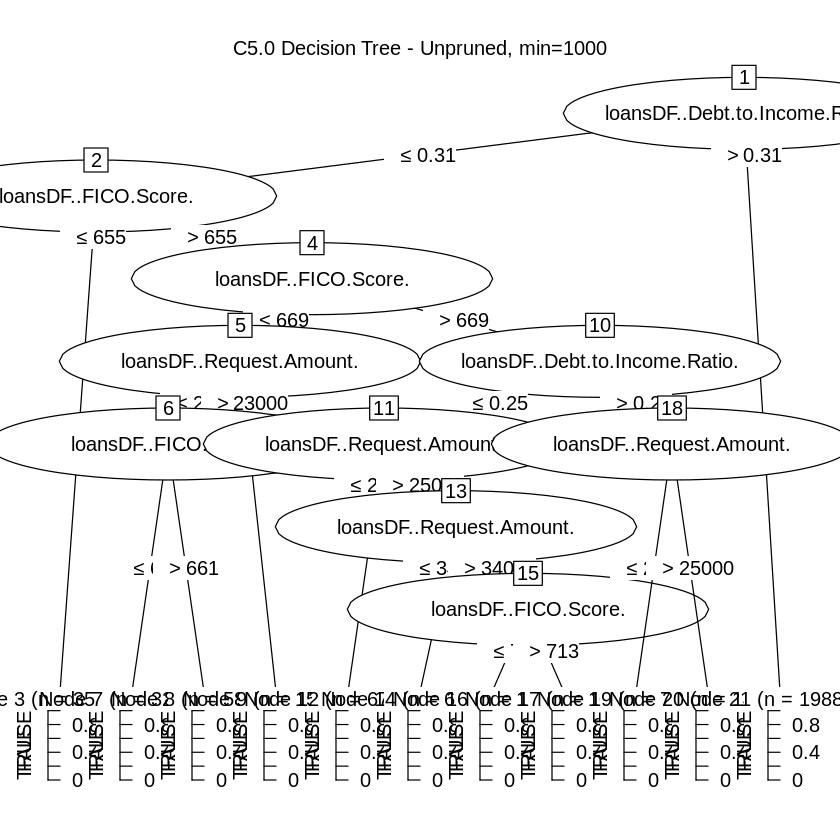

In [17]:
# Creates a C.5 model using the input data frame and Approval as the target
dt_model <- C5.0(input, loansDF$Approval, control = C5.0Control(noGlobalPruning = TRUE, minCases=1000))

# Plots the model for a visual representation
plot(dt_model, main="C5.0 Decision Tree - Unpruned, min=1000")


Then, I used summary to give me a text version of the decision tree which wound up being much easier to understand than the visual model.

In [18]:
# Prints out the text version of the decision tree model
summary(dt_model)


Call:
C5.0.default(x = input, y = loansDF$Approval, control
 = C5.0Control(noGlobalPruning = TRUE, minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Tue Dec 12 00:02:44 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

loansDF..Debt.to.Income.Ratio. > 0.31: FALSE (19884/1160)
loansDF..Debt.to.Income.Ratio. <= 0.31:
:...loansDF..FICO.Score. <= 655: FALSE (35346/894)
    loansDF..FICO.Score. > 655:
    :...loansDF..FICO.Score. <= 669:
        :...loansDF..Request.Amount. > 23000: FALSE (1547/529)
        :   loansDF..Request.Amount. <= 23000:
        :   :...loansDF..FICO.Score. <= 661: FALSE (3246/1418)
        :       loansDF..FICO.Score. > 661: TRUE (5892/2056)
        loansDF..FICO.Score. > 669:
        :...loansDF..Debt.to.Income.Ratio. > 0.25:
            :...loansDF..Request.Amount. <= 25000: TRUE (7112/2658)
            :   loansDF..Request.Amount. > 25000: FALSE (1429/455)
    

Based on this decision tree model,  if a person's debt to income ratio is greater than 0.31, they will be denied a loan.

If it is less than or equal 0.31, and they have a FICO credit score greater than 655, and the amount they request is greater than 23,000 dollars, the request will be denied. However, if the amount request is less than or equal to $23,000 and their credit score is greater than 661, they will be approved.

There are other decisions in the tree, however, for the sake of my analysis I will only explain that branch.

Next, I used the CART classifier to create a decision tree, which uses the rpart libraries.

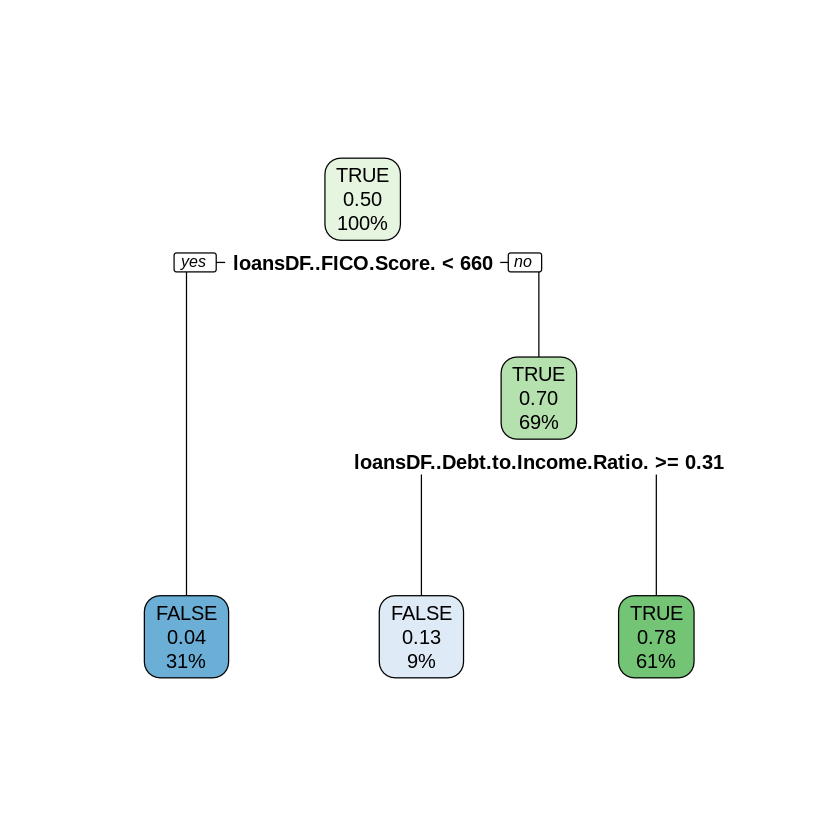

In [19]:
# Creates the DT model using input dataframe and the Approval feature in the data frame
model <- rpart(loansDF$Approval ~ ., data = input, method = "class")

# Plots the DT model for a visual representation
rpart.plot(model)

Based on this decision tree model, if a person tries to get approved for a loan and has a FICO credit score less than 660, they will not get approved for a loan. If a person has a FICO credit score greater than 660 and their debt to income is greater to or equal than 0.31, they will get approved for a loan. However, if their debt to income ratio is less than 0.31, they will be denied a loan.